<a href="https://colab.research.google.com/github/GabrielGalani/Bootcamp_Alura_Dados/blob/main/Bootcamp_dados_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np

## Importando dados

In [119]:
url = 'https://raw.githubusercontent.com/GabrielGalani/Bootcamp_Alura_Dados/main/Dados_1_tratamento_sql/dados_tratados.csv'
dataset = pd.read_csv(url, sep=';', encoding='iso8859-1')
dataset.head()

,id_cliente,id_solicitacao_emp,id_historico_emp,idade_cliente,salario_anual,propriedade,anos_trabalhados,motivo_emp,pontuacao_emp,valor_emp_solicitado,taxa_juros,possibilidade_inadimplencia,percentual_emp_salario,inadimplencia_anterior,anos_primeira_solc_emp
0,75vberrk-0h2s,000asytg-qpl2,12mpifxg-wqdp,32,22704,Alugada,4.0,Pag. de débitos,B,6800,0.00,0,0.30,n,8
1,eanek35x-mce1,0073mlaa-cemf,nf9dpwz4-xpto,34,222000,Hipoteca,0.0,Médico,A,13000,8.49,0,0.06,n,7
2,xmy2bpi5-zpbf,008c2fiu-sc1z,dbh91gky-d4fl,35,48000,Própria,6.0,Melhora do lar,C,4200,13.61,0,0.09,n,7
3,z2qddqw6-cqk7,00ck4yf2-seqx,enxnv2dg-5quc,40,52000,Alugada,2.0,Educativo,F,15000,18.62,1,0.29,y,17
4,jmeqislp-8wmt,00crs4fj-uet5,ixuhltby-i4h2,22,24000,Própria,3.0,Educativo,B,6000,11.49,0,0.25,n,4


## Analisando os dados

In [120]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_cliente                   34485 non-null  object 
 1   id_solicitacao_emp           34485 non-null  object 
 2   id_historico_emp             34485 non-null  object 
 3   idade_cliente                34485 non-null  int64  
 4   salario_anual                34485 non-null  int64  
 5   propriedade                  34154 non-null  object 
 6   anos_trabalhados             34485 non-null  float64
 7   motivo_emp                   34174 non-null  object 
 8   pontuacao_emp                34176 non-null  object 
 9   valor_emp_solicitado         34485 non-null  int64  
 10  taxa_juros                   34485 non-null  float64
 11  possibilidade_inadimplencia  34485 non-null  int64  
 12  percentual_emp_salario       34485 non-null  float64
 13  inadimplencia_an

É possível identificar a presença de dados núlos em todas as colunas do dataset

In [121]:
dataset.describe()

,idade_cliente,salario_anual,anos_trabalhados,valor_emp_solicitado,taxa_juros,possibilidade_inadimplencia,percentual_emp_salario,anos_primeira_solc_emp
count,34485.000000,3.448500e+04,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000
mean,27.473481,6.538181e+04,4.613977,9498.506597,9.854951,0.216007,0.168674,5.808583
std,6.853453,6.145439e+04,4.159927,6359.925164,4.561538,0.411525,0.107528,4.063816
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.800000e+04,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.590000,0.000000,0.150000,4.000000
75%,30.000000,7.870000e+04,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Fica claro aqui dados muito discrepantes na colina **Idade_cliente** e **Anos_trabalhados**

In [122]:
dataset.head()

,id_cliente,id_solicitacao_emp,id_historico_emp,idade_cliente,salario_anual,propriedade,anos_trabalhados,motivo_emp,pontuacao_emp,valor_emp_solicitado,taxa_juros,possibilidade_inadimplencia,percentual_emp_salario,inadimplencia_anterior,anos_primeira_solc_emp
0,75vberrk-0h2s,000asytg-qpl2,12mpifxg-wqdp,32,22704,Alugada,4.0,Pag. de débitos,B,6800,0.00,0,0.30,n,8
1,eanek35x-mce1,0073mlaa-cemf,nf9dpwz4-xpto,34,222000,Hipoteca,0.0,Médico,A,13000,8.49,0,0.06,n,7
2,xmy2bpi5-zpbf,008c2fiu-sc1z,dbh91gky-d4fl,35,48000,Própria,6.0,Melhora do lar,C,4200,13.61,0,0.09,n,7
3,z2qddqw6-cqk7,00ck4yf2-seqx,enxnv2dg-5quc,40,52000,Alugada,2.0,Educativo,F,15000,18.62,1,0.29,y,17
4,jmeqislp-8wmt,00crs4fj-uet5,ixuhltby-i4h2,22,24000,Própria,3.0,Educativo,B,6000,11.49,0,0.25,n,4


In [123]:
dataset['propriedade'].unique()  

array(['Alugada', 'Hipoteca', 'Própria', 'Outros', nan], dtype=object)

In [124]:
dataset['motivo_emp'].unique()

array(['Pag. de débitos', 'Médico', 'Melhora do lar', 'Educativo',
       'Pessoal', 'Empreendimento', nan], dtype=object)

In [125]:
dataset['pontuacao_emp'].unique()

array(['B', 'A', 'C', 'F', 'D', nan, 'E', 'G'], dtype=object)

In [126]:
dataset['inadimplencia_anterior'].unique()

array(['n', 'y', nan], dtype=object)

In [127]:
dataset['possibilidade_inadimplencia'].value_counts(normalize = True)

0    0.783993
1    0.216007
Name: possibilidade_inadimplencia, dtype: float64

Todos os dados núlos foram identificados e serão tratados logo abaixo

## Tratamento de dados

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_cliente                   34485 non-null  object 
 1   id_solicitacao_emp           34485 non-null  object 
 2   id_historico_emp             34485 non-null  object 
 3   idade_cliente                34485 non-null  int64  
 4   salario_anual                34485 non-null  int64  
 5   propriedade                  34154 non-null  object 
 6   anos_trabalhados             34485 non-null  float64
 7   motivo_emp                   34174 non-null  object 
 8   pontuacao_emp                34176 non-null  object 
 9   valor_emp_solicitado         34485 non-null  int64  
 10  taxa_juros                   34485 non-null  float64
 11  possibilidade_inadimplencia  34485 non-null  int64  
 12  percentual_emp_salario       34485 non-null  float64
 13  inadimplencia_an

In [129]:
dataset.dropna(inplace=True)

In [130]:
dataset.isna().sum()

id_cliente                     0
id_solicitacao_emp             0
id_historico_emp               0
idade_cliente                  0
salario_anual                  0
propriedade                    0
anos_trabalhados               0
motivo_emp                     0
pontuacao_emp                  0
valor_emp_solicitado           0
taxa_juros                     0
possibilidade_inadimplencia    0
percentual_emp_salario         0
inadimplencia_anterior         0
anos_primeira_solc_emp         0
dtype: int64

In [131]:
dataset = dataset.drop(columns=['id_cliente', 'id_solicitacao_emp', 'id_historico_emp'])
dataset.head()

,idade_cliente,salario_anual,propriedade,anos_trabalhados,motivo_emp,pontuacao_emp,valor_emp_solicitado,taxa_juros,possibilidade_inadimplencia,percentual_emp_salario,inadimplencia_anterior,anos_primeira_solc_emp
0,32,22704,Alugada,4.0,Pag. de débitos,B,6800,0.00,0,0.30,n,8
1,34,222000,Hipoteca,0.0,Médico,A,13000,8.49,0,0.06,n,7
2,35,48000,Própria,6.0,Melhora do lar,C,4200,13.61,0,0.09,n,7
3,40,52000,Alugada,2.0,Educativo,F,15000,18.62,1,0.29,y,17
4,22,24000,Própria,3.0,Educativo,B,6000,11.49,0,0.25,n,4


In [132]:
total_de_dados = dataset.shape[0]
print('Após a exclusão de dados núlos, restaram na base dade dados: %d' % total_de_dados)

Após a exclusão de dados núlos, restaram na base dade dados: 33360


Foram retirados os dados núlos e as colunas de id's que para o presente estudo não seriam úteis

## Outliers

Inicei o tratamento definindo uma função para plotar um boxplot

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
def plot_outliers(Data_set, xpro, ypro, titulo, xname, yname):
  plt.figure(figsize=(12,8))
  sns.boxplot(data=Data_set, x=xpro , y=ypro)
  plt.title(titulo , loc="center", fontsize=18)
  plt.xlabel(xname)
  plt.ylabel(yname)

  plt.show()

In [135]:
dataset.head()

,idade_cliente,salario_anual,propriedade,anos_trabalhados,motivo_emp,pontuacao_emp,valor_emp_solicitado,taxa_juros,possibilidade_inadimplencia,percentual_emp_salario,inadimplencia_anterior,anos_primeira_solc_emp
0,32,22704,Alugada,4.0,Pag. de débitos,B,6800,0.00,0,0.30,n,8
1,34,222000,Hipoteca,0.0,Médico,A,13000,8.49,0,0.06,n,7
2,35,48000,Própria,6.0,Melhora do lar,C,4200,13.61,0,0.09,n,7
3,40,52000,Alugada,2.0,Educativo,F,15000,18.62,1,0.29,y,17
4,22,24000,Própria,3.0,Educativo,B,6000,11.49,0,0.25,n,4


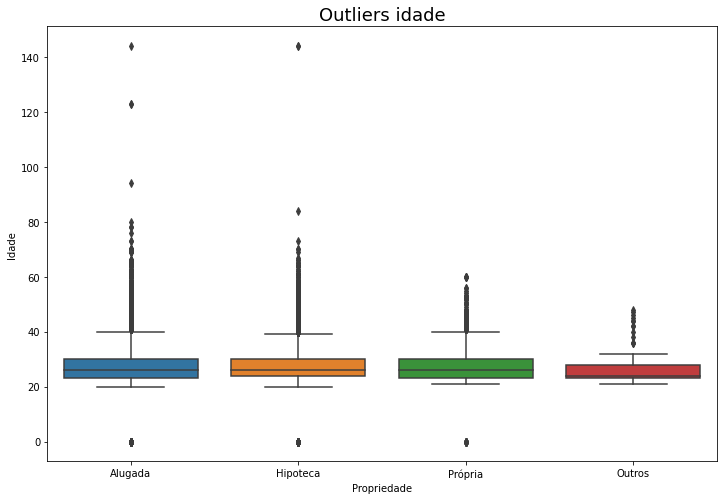

In [136]:
plot_outliers(dataset, 'propriedade', 'idade_cliente', 'Outliers idade', 'Propriedade', 'Idade')

Podemos identificar que há registros abaixo de **18 anos** de idade e acima de **80 anos** de idade, vamos remover esses registros fazendo um filtro

In [137]:
dataset = dataset[(dataset['idade_cliente'] < 80) & (dataset['idade_cliente'] > 18)]

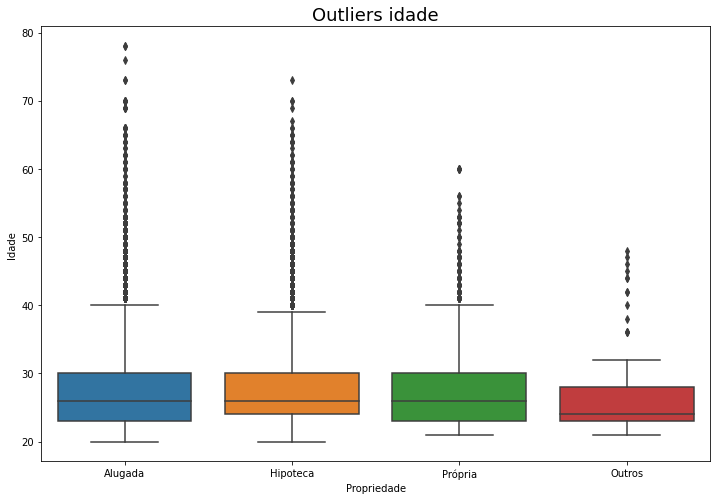

In [138]:
plot_outliers(dataset, 'propriedade', 'idade_cliente', 'Outliers idade', 'Propriedade', 'Idade')

Retiramos os Outliers da variável **idade_cliente**. partiremos agora para variável **anos_trabalhados** onde identificamos valores altos.

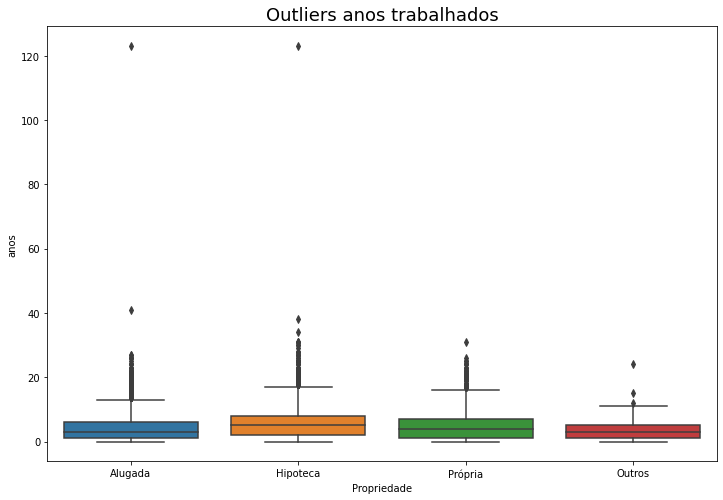

In [139]:
plot_outliers(dataset, 'propriedade', 'anos_trabalhados', 'Outliers anos trabalhados', 'Propriedade', 'anos')

Identificamos valores acima de **100 anos** de trabalho, efetuaremos o filtro como corte de Outliers

In [140]:
dataset = dataset[(dataset['anos_trabalhados'] < 60)]
dataset.head()

,idade_cliente,salario_anual,propriedade,anos_trabalhados,motivo_emp,pontuacao_emp,valor_emp_solicitado,taxa_juros,possibilidade_inadimplencia,percentual_emp_salario,inadimplencia_anterior,anos_primeira_solc_emp
0,32,22704,Alugada,4.0,Pag. de débitos,B,6800,0.00,0,0.30,n,8
1,34,222000,Hipoteca,0.0,Médico,A,13000,8.49,0,0.06,n,7
2,35,48000,Própria,6.0,Melhora do lar,C,4200,13.61,0,0.09,n,7
3,40,52000,Alugada,2.0,Educativo,F,15000,18.62,1,0.29,y,17
4,22,24000,Própria,3.0,Educativo,B,6000,11.49,0,0.25,n,4


## Verificando tipos de dados

In [141]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33142 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade_cliente                33142 non-null  int64  
 1   salario_anual                33142 non-null  int64  
 2   propriedade                  33142 non-null  object 
 3   anos_trabalhados             33142 non-null  float64
 4   motivo_emp                   33142 non-null  object 
 5   pontuacao_emp                33142 non-null  object 
 6   valor_emp_solicitado         33142 non-null  int64  
 7   taxa_juros                   33142 non-null  float64
 8   possibilidade_inadimplencia  33142 non-null  int64  
 9   percentual_emp_salario       33142 non-null  float64
 10  inadimplencia_anterior       33142 non-null  object 
 11  anos_primeira_solc_emp       33142 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.3+ MB


Verificamos que a variável **Anos trabalhados** está como tipo FLOAT, com isso, faremos a conversão para INT

In [142]:
dataset['anos_trabalhados'] = dataset['anos_trabalhados'].astype('int64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33142 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade_cliente                33142 non-null  int64  
 1   salario_anual                33142 non-null  int64  
 2   propriedade                  33142 non-null  object 
 3   anos_trabalhados             33142 non-null  int64  
 4   motivo_emp                   33142 non-null  object 
 5   pontuacao_emp                33142 non-null  object 
 6   valor_emp_solicitado         33142 non-null  int64  
 7   taxa_juros                   33142 non-null  float64
 8   possibilidade_inadimplencia  33142 non-null  int64  
 9   percentual_emp_salario       33142 non-null  float64
 10  inadimplencia_anterior       33142 non-null  object 
 11  anos_primeira_solc_emp       33142 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 3.3+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Correlação

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
dataset['inadimplencia_anterior'] = LabelEncoder().fit_transform(dataset['inadimplencia_anterior'])
dataset.head()

,idade_cliente,salario_anual,propriedade,anos_trabalhados,motivo_emp,pontuacao_emp,valor_emp_solicitado,taxa_juros,possibilidade_inadimplencia,percentual_emp_salario,inadimplencia_anterior,anos_primeira_solc_emp
0,32,22704,Alugada,4,Pag. de débitos,B,6800,0.00,0,0.30,0,8
1,34,222000,Hipoteca,0,Médico,A,13000,8.49,0,0.06,0,7
2,35,48000,Própria,6,Melhora do lar,C,4200,13.61,0,0.09,0,7
3,40,52000,Alugada,2,Educativo,F,15000,18.62,1,0.29,1,17
4,22,24000,Própria,3,Educativo,B,6000,11.49,0,0.25,0,4


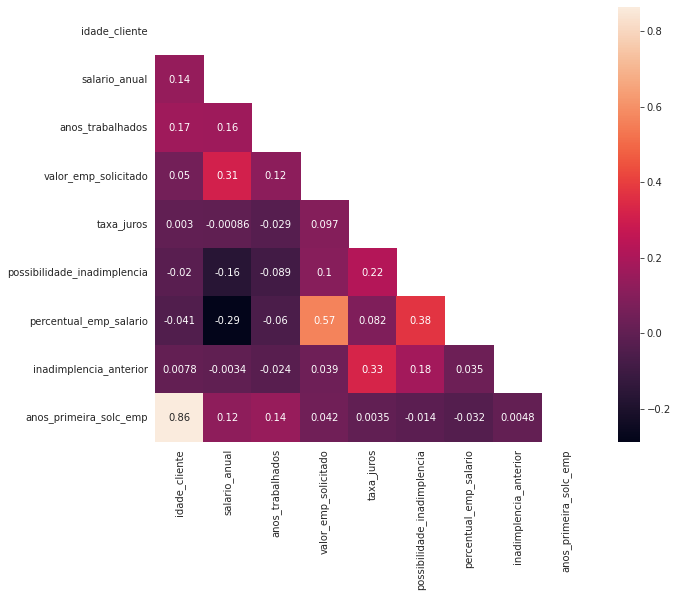

In [145]:
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax =plt.subplots(figsize=(10,8))
    ax = sns.heatmap(corr, mask = mask, square = True, annot = True)

Agora que temos uma ideia da correlação entre as variáveis, vamos dividir a vairável explicativa da variável alto que é a **inadimplencia_anterior**

In [146]:
x = dataset.drop(['inadimplencia_anterior'], axis = 1)
alvo = dataset['inadimplencia_anterior']

## Distribuição das variáveis

In [147]:
Total_dados = dataset['inadimplencia_anterior'].count()
inadimplente = dataset.query('inadimplencia_anterior == 1')['inadimplencia_anterior'].count()
percent_inadimplente = (round((inadimplente * 100)/Total_dados, 2))
não_inadimplente = dataset.query('inadimplencia_anterior == 0')['inadimplencia_anterior'].count()
percent_não_inadimplente = (round((não_inadimplente * 100)/Total_dados, 2))


print('O total de linhas do dataset é: %d ' % Total_dados)
print('Desse total %.2f%% são inadimplentes' % percent_inadimplente)
print('Desse total %.2f%% não são inadimplentes' % percent_não_inadimplente)

O total de linhas do dataset é: 33142 
Desse total 17.61% são inadimplentes
Desse total 82.39% não são inadimplentes


Verificamos que há um desbalanceamento entre os valores da variável alvo. Resolveremos esse problema efetuando a técnica de **Oversampling**

## Variáveis Categóricas

In [148]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [149]:
colunas_categoricas = ['propriedade','motivo_emp','pontuacao_emp']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(), colunas_categoricas),
    remainder='passthrough')

dataset_modelo = one_hot_enc.fit_transform(x)
dataset_modelo = pd.DataFrame(dataset_modelo, columns=one_hot_enc.get_feature_names_out())
dataset_modelo.head()

,onehotencoder__propriedade_Alugada,onehotencoder__propriedade_Hipoteca,onehotencoder__propriedade_Outros,onehotencoder__propriedade_Própria,onehotencoder__motivo_emp_Educativo,onehotencoder__motivo_emp_Empreendimento,onehotencoder__motivo_emp_Melhora do lar,onehotencoder__motivo_emp_Médico,onehotencoder__motivo_emp_Pag. de débitos,onehotencoder__motivo_emp_Pessoal,...,onehotencoder__pontuacao_emp_F,onehotencoder__pontuacao_emp_G,remainder__idade_cliente,remainder__salario_anual,remainder__anos_trabalhados,remainder__valor_emp_solicitado,remainder__taxa_juros,remainder__possibilidade_inadimplencia,remainder__percentual_emp_salario,remainder__anos_primeira_solc_emp
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,32.0,22704.0,4.0,6800.0,0.00,0.0,0.30,8.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,34.0,222000.0,0.0,13000.0,8.49,0.0,0.06,7.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,35.0,48000.0,6.0,4200.0,13.61,0.0,0.09,7.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,40.0,52000.0,2.0,15000.0,18.62,1.0,0.29,17.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,24000.0,3.0,6000.0,11.49,0.0,0.25,4.0


## Normalização dos dados

In [150]:
from sklearn.preprocessing import MinMaxScaler

In [151]:
scaler = MinMaxScaler()
scaler.fit(dataset_modelo)
dataset_modelo = scaler.transform(dataset_modelo)
dataset_modelo = pd.DataFrame(dataset_modelo, columns = one_hot_enc.get_feature_names_out())
dataset_modelo.head()

,onehotencoder__propriedade_Alugada,onehotencoder__propriedade_Hipoteca,onehotencoder__propriedade_Outros,onehotencoder__propriedade_Própria,onehotencoder__motivo_emp_Educativo,onehotencoder__motivo_emp_Empreendimento,onehotencoder__motivo_emp_Melhora do lar,onehotencoder__motivo_emp_Médico,onehotencoder__motivo_emp_Pag. de débitos,onehotencoder__motivo_emp_Pessoal,...,onehotencoder__pontuacao_emp_F,onehotencoder__pontuacao_emp_G,remainder__idade_cliente,remainder__salario_anual,remainder__anos_trabalhados,remainder__valor_emp_solicitado,remainder__taxa_juros,remainder__possibilidade_inadimplencia,remainder__percentual_emp_salario,remainder__anos_primeira_solc_emp
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.206897,0.011131,0.097561,0.194286,0.000000,0.0,0.361446,0.214286
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.241379,0.108835,0.000000,0.371429,0.365633,0.0,0.072289,0.178571
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.258621,0.023532,0.146341,0.120000,0.586133,0.0,0.108434,0.178571
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.344828,0.025493,0.048780,0.428571,0.801895,1.0,0.349398,0.535714
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.034483,0.011766,0.073171,0.171429,0.494832,0.0,0.301205,0.071429


Os dados foram normalizados em 0.0 e 1.0, sendo 1 quando há características e 0 quando não há. 

## Aprendizado do modelo de ML

A empresa contratante deseja identificar os clientes inadinplentes, para tanto, modelos os dados e balanceamos a variável alvo.

Serão usados os algorítimos: Gradient Boosting e Regressão Logística. 

## Importando os modelos

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score


import matplotlib.pyplot as plt
import matplotlib.colors

## Oversampling e criação de veráveis teste

In [153]:
dataset_modelo.head()

,onehotencoder__propriedade_Alugada,onehotencoder__propriedade_Hipoteca,onehotencoder__propriedade_Outros,onehotencoder__propriedade_Própria,onehotencoder__motivo_emp_Educativo,onehotencoder__motivo_emp_Empreendimento,onehotencoder__motivo_emp_Melhora do lar,onehotencoder__motivo_emp_Médico,onehotencoder__motivo_emp_Pag. de débitos,onehotencoder__motivo_emp_Pessoal,...,onehotencoder__pontuacao_emp_F,onehotencoder__pontuacao_emp_G,remainder__idade_cliente,remainder__salario_anual,remainder__anos_trabalhados,remainder__valor_emp_solicitado,remainder__taxa_juros,remainder__possibilidade_inadimplencia,remainder__percentual_emp_salario,remainder__anos_primeira_solc_emp
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.206897,0.011131,0.097561,0.194286,0.000000,0.0,0.361446,0.214286
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.241379,0.108835,0.000000,0.371429,0.365633,0.0,0.072289,0.178571
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.258621,0.023532,0.146341,0.120000,0.586133,0.0,0.108434,0.178571
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.344828,0.025493,0.048780,0.428571,0.801895,1.0,0.349398,0.535714
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.034483,0.011766,0.073171,0.171429,0.494832,0.0,0.301205,0.071429


In [154]:
SEED = 50

In [155]:
x_treino, x_teste, alvo_treino, alvo_teste = train_test_split(dataset_modelo, alvo, random_state = SEED, stratify = alvo)
alvo_treino

17349    0
22540    1
7775     0
28637    1
15383    0
        ..
15242    1
13203    0
3072     0
15204    0
10101    0
Name: inadimplencia_anterior, Length: 24856, dtype: int64

In [156]:
smote = SMOTE(random_state = SEED)
X_balanceado_over, alvo_balanceado_over = smote.fit_resample(x_treino, alvo_treino)
X_balanceado_over

,onehotencoder__propriedade_Alugada,onehotencoder__propriedade_Hipoteca,onehotencoder__propriedade_Outros,onehotencoder__propriedade_Própria,onehotencoder__motivo_emp_Educativo,onehotencoder__motivo_emp_Empreendimento,onehotencoder__motivo_emp_Melhora do lar,onehotencoder__motivo_emp_Médico,onehotencoder__motivo_emp_Pag. de débitos,onehotencoder__motivo_emp_Pessoal,...,onehotencoder__pontuacao_emp_F,onehotencoder__pontuacao_emp_G,remainder__idade_cliente,remainder__salario_anual,remainder__anos_trabalhados,remainder__valor_emp_solicitado,remainder__taxa_juros,remainder__possibilidade_inadimplencia,remainder__percentual_emp_salario,remainder__anos_primeira_solc_emp
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.155172,0.024022,0.048780,0.342857,0.661929,1.0,0.289157,0.178571
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.137931,0.019120,0.146341,0.228571,0.642119,1.0,0.253012,0.178571
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.068966,0.013727,0.195122,0.028571,0.539621,0.0,0.048193,0.071429
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.034483,0.019610,0.146341,0.285714,0.000000,0.0,0.301205,0.035714
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.155172,0.031866,0.048780,0.137143,0.000000,0.0,0.084337,0.107143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.043169,0.020800,0.158629,0.206763,0.616995,0.0,0.204819,0.035714
40954,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.053541,0.030913,0.129664,0.637606,0.562673,0.0,0.434354,0.035714
40955,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.177377,0.008598,0.014043,0.082208,0.567034,1.0,0.201351,0.188853
40956,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.042890,0.027313,0.077135,0.380716,0.574444,0.0,0.289456,0.041519


## Testando os modelos

In [157]:
tree = DecisionTreeClassifier(random_state=SEED)
tree.fit(X_balanceado_over, alvo_balanceado_over)
tree_predict = tree.predict(x_teste)

In [158]:
print(classification_report(alvo_teste, tree_predict))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      6827
           1       0.53      0.56      0.54      1459

    accuracy                           0.83      8286
   macro avg       0.72      0.73      0.72      8286
weighted avg       0.84      0.83      0.84      8286



In [159]:
mapa_calor = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#12239e","#92dfa6","#9cd33b"])

Agora vamos plotar a matriz de confusão da **DecisionTreeClassifier**

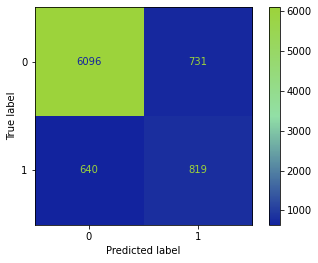

In [160]:
ConfusionMatrixDisplay.from_estimator(tree, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

In [161]:
gboost = GradientBoostingClassifier(random_state=SEED)
gboost.fit(X_balanceado_over, alvo_balanceado_over)
gboost_predict = gboost.predict(x_teste)

In [162]:
print(classification_report(alvo_teste, gboost_predict))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      6827
           1       0.51      0.97      0.67      1459

    accuracy                           0.83      8286
   macro avg       0.75      0.89      0.78      8286
weighted avg       0.91      0.83      0.85      8286



Agora vamos plotar a matriz de confusão **GradientBoosting**

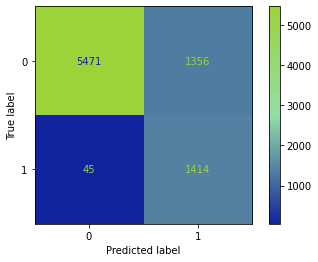

In [163]:
ConfusionMatrixDisplay.from_estimator(gboost, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

In [164]:
logistic_re = LogisticRegression(random_state=SEED, max_iter =1000)
logistic_re.fit(X_balanceado_over, alvo_balanceado_over)
reglog_predict = logistic_re.predict(x_teste)

In [165]:
print(classification_report(alvo_teste, reglog_predict))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      6827
           1       0.51      0.99      0.67      1459

    accuracy                           0.83      8286
   macro avg       0.75      0.89      0.78      8286
weighted avg       0.91      0.83      0.85      8286



Plotagem da Matriz de confusão **LogisticRegression**

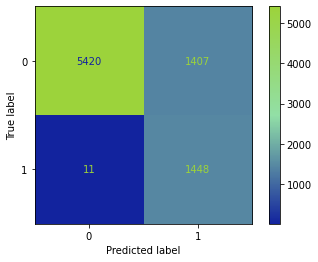

In [166]:
ConfusionMatrixDisplay.from_estimator(logistic_re, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

Agora salvaremos o modelo baseado em balanceamento **oversampling**

In [167]:
metricas_over = pd.DataFrame({'Acurácia treino':[tree.score(x_treino, alvo_treino), 
                                 gboost.score(x_treino, alvo_treino), 
                                 logistic_re.score(x_treino, alvo_treino)], 
            'Acurácia teste': [tree.score(x_teste, alvo_teste), 
                                 gboost.score(x_teste, alvo_teste), 
                                 logistic_re.score(x_teste, alvo_teste)], 
            'Recall':[recall_score(alvo_teste, tree_predict),
                      recall_score(alvo_teste, gboost_predict),
                      recall_score(alvo_teste, reglog_predict)]},
             index = ['Árvore de Decisão Oversampling', 'Gradient Boosting Oversampling', 'Regressão Logísitica Oversampling'])

Feito os testes em balanceamento Oversampling, agora vamos utilizar a técnica de **Undersampling** a fim de balancear os dados e comparar no futuro

## Undersampling

In [168]:
under = RandomUnderSampler(random_state=SEED,sampling_strategy=0.5)
X_balanceado_under, alvo_balanceado_under = under.fit_resample(x_treino, alvo_treino)
X_balanceado_under

,onehotencoder__propriedade_Alugada,onehotencoder__propriedade_Hipoteca,onehotencoder__propriedade_Outros,onehotencoder__propriedade_Própria,onehotencoder__motivo_emp_Educativo,onehotencoder__motivo_emp_Empreendimento,onehotencoder__motivo_emp_Melhora do lar,onehotencoder__motivo_emp_Médico,onehotencoder__motivo_emp_Pag. de débitos,onehotencoder__motivo_emp_Pessoal,...,onehotencoder__pontuacao_emp_F,onehotencoder__pontuacao_emp_G,remainder__idade_cliente,remainder__salario_anual,remainder__anos_trabalhados,remainder__valor_emp_solicitado,remainder__taxa_juros,remainder__possibilidade_inadimplencia,remainder__percentual_emp_salario,remainder__anos_primeira_solc_emp
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.241379,0.051476,0.048780,0.285714,0.323428,0.0,0.120482,0.178571
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.103448,0.033337,0.268293,0.714286,0.673988,1.0,0.373494,0.000000
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.120690,0.061281,0.170732,0.257143,0.323428,0.0,0.084337,0.142857
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.189655,0.029415,0.121951,0.485714,0.383290,0.0,0.337349,0.214286
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.103448,0.032356,0.170732,0.114286,0.516365,0.0,0.072289,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13126,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.155172,0.018826,0.000000,0.400000,0.614556,0.0,0.433735,0.214286
13127,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.120690,0.029415,0.268293,0.114286,0.602067,0.0,0.084337,0.178571
13128,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.172414,0.058830,0.341463,0.285714,0.562446,0.0,0.096386,0.214286
13129,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.224138,0.012256,0.000000,0.085714,0.539621,0.0,0.144578,0.142857


In [169]:
tree = DecisionTreeClassifier(random_state=SEED)
tree.fit(X_balanceado_under, alvo_balanceado_under)
tree_predict = tree.predict(x_teste)

In [170]:
print(classification_report(alvo_teste, tree_predict))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      6827
           1       0.51      0.69      0.58      1459

    accuracy                           0.83      8286
   macro avg       0.72      0.77      0.74      8286
weighted avg       0.85      0.83      0.84      8286



Plotando a matriz de confusão **DecisionTreeClassifier**

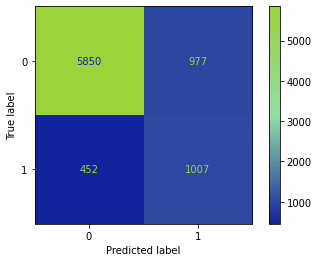

In [171]:
ConfusionMatrixDisplay.from_estimator(tree, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

In [172]:
gboost = GradientBoostingClassifier(random_state=SEED)
gboost.fit(X_balanceado_under, alvo_balanceado_under)
gboost_predict = gboost.predict(x_teste)

In [173]:
print(classification_report(alvo_teste, gboost_predict))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      6827
           1       0.51      0.99      0.67      1459

    accuracy                           0.83      8286
   macro avg       0.75      0.89      0.78      8286
weighted avg       0.91      0.83      0.85      8286



Plotando a matriz de confusão **GradienteBoostingClassifier**

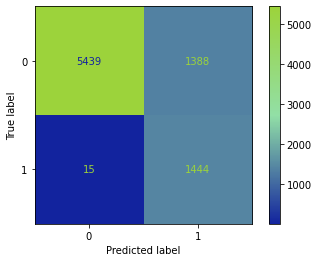

In [174]:
ConfusionMatrixDisplay.from_estimator(gboost, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

In [175]:
logistic_re = LogisticRegression(random_state=SEED, max_iter =1000)
logistic_re.fit(X_balanceado_under, alvo_balanceado_under)
reglog_predict = logistic_re.predict(x_teste)

In [176]:
print(classification_report(alvo_teste, reglog_predict))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      6827
           1       0.51      0.99      0.67      1459

    accuracy                           0.83      8286
   macro avg       0.75      0.89      0.78      8286
weighted avg       0.91      0.83      0.85      8286



Plotando a matriz de confusão **LogisticRegression**

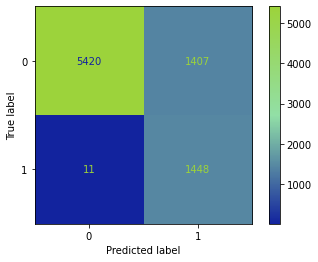

In [177]:
ConfusionMatrixDisplay.from_estimator(logistic_re, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

Salvando os dados de Undersampling

In [178]:
metricas_under = pd.DataFrame({'Acurácia treino':[tree.score(x_treino, alvo_treino), 
                                 gboost.score(x_treino, alvo_treino), 
                                 logistic_re.score(x_treino, alvo_treino)], 
            'Acurácia teste': [tree.score(x_teste, alvo_teste), 
                                 gboost.score(x_teste, alvo_teste), 
                                 logistic_re.score(x_teste, alvo_teste)], 
            'Recall':[recall_score(alvo_teste, tree_predict),
                      recall_score(alvo_teste, gboost_predict),
                      recall_score(alvo_teste, reglog_predict)]},
             index = ['Árvore de Decisão Undersampling', 'Gradient Boosting Undersampling', 'Regressão Logísitica Undersampling'])

## Comparando os dados

In [179]:
display(metricas_over,metricas_under)

,Acurácia treino,Acurácia teste,Recall
Árvore de Decisão Oversampling,0.999477,0.834540,0.561343
Gradient Boosting Oversampling,0.829257,0.830920,0.969157
Regressão Logísitica Oversampling,0.822417,0.828868,0.992461


,Acurácia treino,Acurácia teste,Recall
Árvore de Decisão Undersampling,0.929152,0.827540,0.690199
Gradient Boosting Undersampling,0.827687,0.830678,0.989719
Regressão Logísitica Undersampling,0.822377,0.828868,0.992461


Analisando os dados dos testes:

A árvore de decisão apresenta overfitting tanto no oversampling quanto undersampling;

O gradient boosting foi o modelo mais consistente;

A regressão logística apresenta um baixo desempenho.
 


## Otimização

In [180]:
parameters = {
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "absolute_error"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9],
    "n_estimators":[10,100]
    }

In [181]:
grid_search = GridSearchCV(GradientBoostingClassifier(random_state = SEED), parameters,scoring='recall',cv=3,verbose = 1)

grid_search.fit(X_balanceado_under, alvo_balanceado_under)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/p

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=50),
             param_grid={'criterion': ['friedman_mse', 'absolute_error'],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [10, 100],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9]},
             scoring='recall', verbose=1)

Verificando os resultados

In [182]:
search_predict = grid_search.best_estimator_
grid_predict = search_predict.predict(x_teste)

In [183]:
grid_search.best_estimator_

GradientBoostingClassifier(max_features='sqrt', random_state=50, subsample=0.9)

In [184]:
print(classification_report(alvo_teste, grid_predict))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      6827
           1       0.51      0.99      0.67      1459

    accuracy                           0.83      8286
   macro avg       0.75      0.89      0.78      8286
weighted avg       0.91      0.83      0.85      8286



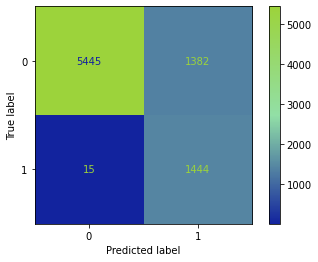

In [185]:
ConfusionMatrixDisplay.from_estimator(search_predict, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

Salvando os modelos otimizados

In [186]:
import pickle

One Hot Encoder

In [190]:
with open('one_hot_encoder.pkl', 'wb') as file:
    pickle.dump(one_hot_enc, file)

Normalizaçao 

In [188]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

Gradiente

In [189]:
with open('modelo_treinado.pkl', 'wb') as file:
    pickle.dump(search_predict, file)